<a href="https://colab.research.google.com/github/pichayaanik/Capstone_PichayaAnik/blob/main/Part_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Part 2: Exploratory Data Analysis**
---


In [3]:
# Install pythainlp library
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.6 MB 15.7 MB/s 


In [4]:
# Import Basic Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import Sklearn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import NLP Libraries
from gensim.models import LdaModel
from gensim.corpora.dictionary import Dictionary
from pythainlp.tokenize import sent_tokenize, word_tokenize
from pythainlp.corpus import thai_stopwords
import re

In [5]:
# Bangkok Business Corpus
!gdown 1Nn7o6SPq6WwO7U9oMU_vpKu3T06qHsDg # investment
!gdown #econ
!gdown #social
!gdown #finance
!gdown #business
!gdown #data

Downloading...
From: https://drive.google.com/uc?id=1Nn7o6SPq6WwO7U9oMU_vpKu3T06qHsDg
To: /content/investment.csv
100% 549M/549M [00:06<00:00, 88.3MB/s]
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: the following arguments are required: url_or_id
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: the following arguments are required: url_or_id
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok]
             url_or_id
gdown: error: the following arguments are required: url_or_id
usag

In [6]:
investment = pd.read_csv('/content/investment.csv')

investment.head()

,Unnamed: 0,ID,date,category,title,description,article,url,title_count,title_tokenize_list,title_tokenize_unlist,description_count,description_tokenize_list,description_tokenize_unlist,article_count,article_tokenize_list,article_tokenize_unlist
0,0,620009,2014-11-27 09:34:00,การเงิน-การลงทุน,"ทองแท่งขายออก18,600บ.ไม่เปลี่ยนแปลง","ราคาทองคำวันนี้ทองแท่งขายออกบาทละ 18,600 บาท ท...",สมาคมค้าทองคำรายงานราคาทอง 96.5% ประจำวันที่ 2...,https://www.bangkokbiznews.com/news/detail/620009,8,"['ทอง', 'ขาย', 'บ.']",ทอง ขาย บ.,21,"['ราคา', 'ทองคำ', 'ทอง', 'ขาย', 'บาท', 'บาท', ...",ราคา ทองคำ ทอง ขาย บาท บาท ทองรูปพรรณ ขาย บาท ...,83,"['สมาคม', 'ค้า', 'ทองคำ', 'รายงาน', 'ราคา', 'ท...",สมาคม ค้า ทองคำ รายงาน ราคา ทอง ประจำ วันที่ พ...
1,1,620010,2014-11-27 09:36:00,การเงิน-การลงทุน,เงินบาทเปิด32.75/77คาดแกว่งแคบ,ค่าเงินบาทเปิดที่ 32.75/77 บาท/ดอลลาร์ คาดแกว่...,นักบริหารเงินจากธนาคารพาณิชย์ เปิดเผยว่า เงินบ...,https://www.bangkokbiznews.com/news/detail/620010,8,['คาด'],คาด,23,"['ค่าเงินบาท', 'บาท', 'ดอลลาร์', 'คาด', 'ปัจจั...",ค่าเงินบาท บาท ดอลลาร์ คาด ปัจจัย กรอบ บาท ดอล...,186,"['บริหาร', 'ธนาคารพาณิชย์', 'ตลาด', 'ระดับ', '...",บริหาร ธนาคารพาณิชย์ ตลาด ระดับ บาท ดอลลาร์ วา...
2,2,620011,2014-11-27 09:48:00,การเงิน-การลงทุน,คาดหุ้นเช้าแกว่งไซด์เวย์,โบรกฯ คาดหุ้นเช้านี้แกว่งไซด์เวย์ช่วงไร้ปัจจัย...,นายอภิชาติ ผู้บรรเจิดกุล ผู้อำนวยการสายงานวิเค...,https://www.bangkokbiznews.com/news/detail/620011,6,"['คาด', 'หุ้น', 'ด์เวย์']",คาด หุ้น ด์เวย์,15,"['คาด', 'หุ้น', 'ด์เวย์', 'ปัจจัย', 'ประชุม']",คาด หุ้น ด์เวย์ ปัจจัย ประชุม,211,"['อภิ', 'ชาติ', 'บรรเจิด', 'กุล', 'ผู้อำนวยการ...",อภิ ชาติ บรรเจิด กุล ผู้อำนวยการ สายงาน วิเครา...
3,3,620015,2014-11-27 10:08:00,การเงิน-การลงทุน,เนชั่นจ่อปรับค่าโฆษณา20%,"""เนชั่น มัลติมีเดีย กรุ๊ป""หวังรายได้ปีหน้าแตะ3...",นางสาวดวงกมล โชตะนา กรรมการผู้อำนวยการ บริษัท ...,https://www.bangkokbiznews.com/news/detail/620015,6,"['จ่อ', 'ค่าโฆษณา']",จ่อ ค่าโฆษณา,25,"['มัลติมีเดีย', 'กรุ๊ป', 'หวัง', 'รายได้', 'ปี...",มัลติมีเดีย กรุ๊ป หวัง รายได้ ปีหน้า พัน ล้าน ...,738,"['ดวงกมล', 'ตะ', 'นา', 'กรรมการ', 'ผู้อำนวยการ...",ดวงกมล ตะ นา กรรมการ ผู้อำนวยการ บริษัท มัลติม...
4,4,620016,2014-11-27 10:05:00,การเงิน-การลงทุน,ตลาดหลักฟื้นดันส่งออกต.ค.โต3.97%,พาณิชย์มั่นใจปีนี้ไม่ติดลบ-ลุ้นปีหน้าโต4% เอกช...,พาณิชย์เผยส่งออกเดือนต.ค. ขยายตัว 3.97% ต่อเนื...,https://www.bangkokbiznews.com/news/detail/620016,9,"['ตลาด', 'หลัก', 'ฟื้น', 'ดัน', 'ส่งออก', 'ต.ค.']",ตลาด หลัก ฟื้น ดัน ส่งออก ต.ค.,26,"['พาณิชย์', 'มั่นใจ', 'ปี', 'ติดลบ', 'ลุ้น', '...",พาณิชย์ มั่นใจ ปี ติดลบ ลุ้น ปีหน้า ประเมิน ปี...,1281,"['พาณิชย์', 'ออกเดือน', 'ต.ค.', 'ขยายตัว', 'ต่...",พาณิชย์ ออกเดือน ต.ค. ขยายตัว ต่อเนื่อง ตลาด ห...


In [7]:
# Dictionary of DataFrame names and assigned colors
dfs = {'investment':'#F1948A' , 'econ':'#BB8FCE', 'social':'#5DADE2', \
       'finance':'#45B39D', 'business':'#F39C12', 'data':'#D35400'}
cols = ['title', 'description', 'article']

In [8]:
type(dfs['investment'])

str

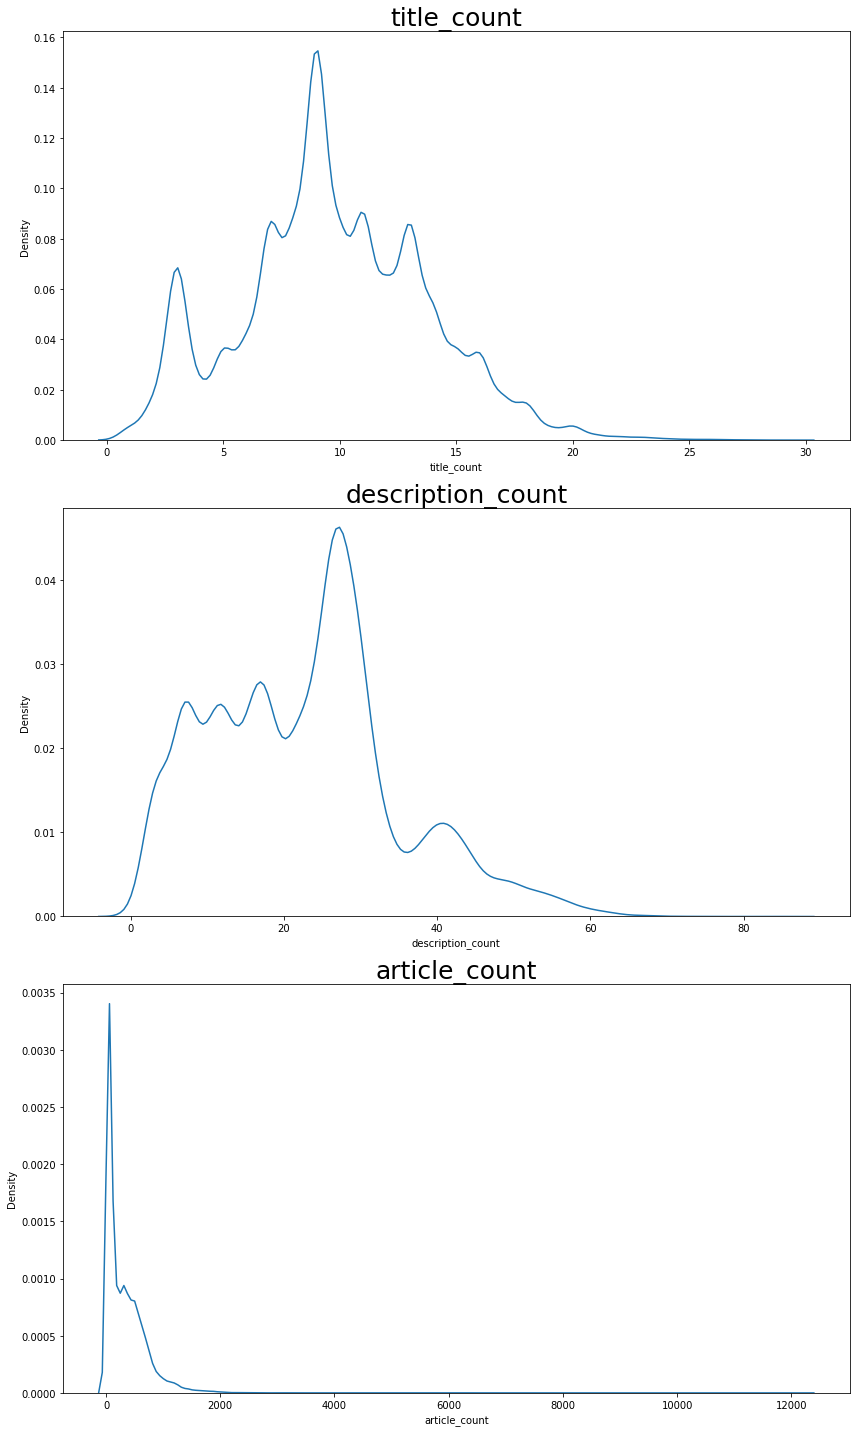

In [12]:
# Length
plt.figure(figsize=(12, 20))
for n, col in enumerate(cols):
  plt.subplot(len(cols), 1, n+1)
  plt.title(col+'_count', size=25)
  sns.kdeplot(data=investment[col+'_count'])
  plt.tight_layout();

In [38]:
# Create function that tokenize, remove stopwords and perform RegularExpression
def tokenize(txt):
  
  ''' 
  Description:
    A function that returns tokenized words with stop words and other regular expressions 
    that do not match English and Thai alphabets removed

  Parameters:
    txt = text string

  Return:
    word tokens as list
  '''

  stopwords = thai_stopwords()
  tokens = word_tokenize(txt, keep_whitespace = False)
  tokens = [token for token in tokens if token not in stopwords]
  tokens = [token for token in tokens if re.match(r'[A-Za-zก-๙0-9]+', token)]
  return tokens

In [39]:
tokenize('เงินบาทปิดที่32.77/78แกว่งแคบ')

['เงินบาท', '32.77', '78', 'แกว่ง', 'แคบ']

In [30]:
word_tokenize('เงินบาทปิดที่32.77/78แกว่งแคบ', keep_whitespace=False)

['เงินบาท', 'ปิด', 'ที่', '32.77', '/', '78', 'แกว่ง', 'แคบ']

In [42]:
investment.dropna()

,Unnamed: 0,ID,date,category,title,description,article,url,title_count,title_tokenize_list,title_tokenize_unlist,description_count,description_tokenize_list,description_tokenize_unlist,article_count,article_tokenize_list,article_tokenize_unlist
0,0,620009,2014-11-27 09:34:00,การเงิน-การลงทุน,"ทองแท่งขายออก18,600บ.ไม่เปลี่ยนแปลง","ราคาทองคำวันนี้ทองแท่งขายออกบาทละ 18,600 บาท ท...",สมาคมค้าทองคำรายงานราคาทอง 96.5% ประจำวันที่ 2...,https://www.bangkokbiznews.com/news/detail/620009,8,"['ทอง', 'ขาย', 'บ.']",ทอง ขาย บ.,21,"['ราคา', 'ทองคำ', 'ทอง', 'ขาย', 'บาท', 'บาท', ...",ราคา ทองคำ ทอง ขาย บาท บาท ทองรูปพรรณ ขาย บาท ...,83,"['สมาคม', 'ค้า', 'ทองคำ', 'รายงาน', 'ราคา', 'ท...",สมาคม ค้า ทองคำ รายงาน ราคา ทอง ประจำ วันที่ พ...
1,1,620010,2014-11-27 09:36:00,การเงิน-การลงทุน,เงินบาทเปิด32.75/77คาดแกว่งแคบ,ค่าเงินบาทเปิดที่ 32.75/77 บาท/ดอลลาร์ คาดแกว่...,นักบริหารเงินจากธนาคารพาณิชย์ เปิดเผยว่า เงินบ...,https://www.bangkokbiznews.com/news/detail/620010,8,['คาด'],คาด,23,"['ค่าเงินบาท', 'บาท', 'ดอลลาร์', 'คาด', 'ปัจจั...",ค่าเงินบาท บาท ดอลลาร์ คาด ปัจจัย กรอบ บาท ดอล...,186,"['บริหาร', 'ธนาคารพาณิชย์', 'ตลาด', 'ระดับ', '...",บริหาร ธนาคารพาณิชย์ ตลาด ระดับ บาท ดอลลาร์ วา...
2,2,620011,2014-11-27 09:48:00,การเงิน-การลงทุน,คาดหุ้นเช้าแกว่งไซด์เวย์,โบรกฯ คาดหุ้นเช้านี้แกว่งไซด์เวย์ช่วงไร้ปัจจัย...,นายอภิชาติ ผู้บรรเจิดกุล ผู้อำนวยการสายงานวิเค...,https://www.bangkokbiznews.com/news/detail/620011,6,"['คาด', 'หุ้น', 'ด์เวย์']",คาด หุ้น ด์เวย์,15,"['คาด', 'หุ้น', 'ด์เวย์', 'ปัจจัย', 'ประชุม']",คาด หุ้น ด์เวย์ ปัจจัย ประชุม,211,"['อภิ', 'ชาติ', 'บรรเจิด', 'กุล', 'ผู้อำนวยการ...",อภิ ชาติ บรรเจิด กุล ผู้อำนวยการ สายงาน วิเครา...
3,3,620015,2014-11-27 10:08:00,การเงิน-การลงทุน,เนชั่นจ่อปรับค่าโฆษณา20%,"""เนชั่น มัลติมีเดีย กรุ๊ป""หวังรายได้ปีหน้าแตะ3...",นางสาวดวงกมล โชตะนา กรรมการผู้อำนวยการ บริษัท ...,https://www.bangkokbiznews.com/news/detail/620015,6,"['จ่อ', 'ค่าโฆษณา']",จ่อ ค่าโฆษณา,25,"['มัลติมีเดีย', 'กรุ๊ป', 'หวัง', 'รายได้', 'ปี...",มัลติมีเดีย กรุ๊ป หวัง รายได้ ปีหน้า พัน ล้าน ...,738,"['ดวงกมล', 'ตะ', 'นา', 'กรรมการ', 'ผู้อำนวยการ...",ดวงกมล ตะ นา กรรมการ ผู้อำนวยการ บริษัท มัลติม...
4,4,620016,2014-11-27 10:05:00,การเงิน-การลงทุน,ตลาดหลักฟื้นดันส่งออกต.ค.โต3.97%,พาณิชย์มั่นใจปีนี้ไม่ติดลบ-ลุ้นปีหน้าโต4% เอกช...,พาณิชย์เผยส่งออกเดือนต.ค. ขยายตัว 3.97% ต่อเนื...,https://www.bangkokbiznews.com/news/detail/620016,9,"['ตลาด', 'หลัก', 'ฟื้น', 'ดัน', 'ส่งออก', 'ต.ค.']",ตลาด หลัก ฟื้น ดัน ส่งออก ต.ค.,26,"['พาณิชย์', 'มั่นใจ', 'ปี', 'ติดลบ', 'ลุ้น', '...",พาณิชย์ มั่นใจ ปี ติดลบ ลุ้น ปีหน้า ประเมิน ปี...,1281,"['พาณิชย์', 'ออกเดือน', 'ต.ค.', 'ขยายตัว', 'ต่...",พาณิชย์ ออกเดือน ต.ค. ขยายตัว ต่อเนื่อง ตลาด ห...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55036,55036,899991,2020-09-29 12:10:00,การเงิน-การลงทุน,"คาดฟื้นตัวขึ้นทดสอบ 1,269 ยังแค่เลือกเก็งกำไรร...",ติดตามการเมืองสหรัฐฯ และไทยช่วง ต.ค. สหรัฐฯ,ประเด็นติดตามที่สำคัญ 1) คะแนนนิยมของผู้สมัครท...,https://www.bangkokbiznews.com/news/detail/899991,10,"['คาด', 'ฟื้นตัว', 'ทดสอบ', 'รายตัว']",คาด ฟื้นตัว ทดสอบ รายตัว,8,"['ติดตาม', 'การเมือง', 'สหรัฐฯ', 'ต.ค.', 'สหรั...",ติดตาม การเมือง สหรัฐฯ ต.ค. สหรัฐฯ,780,"['ประเด็น', 'ติด', 'คะแนนนิยม', 'ผู้สมัคร', 'd...",ประเด็น ติด คะแนนนิยม ผู้สมัคร debate นัด การฟ...
55037,55037,899993,2020-09-29 12:15:00,การเงิน-การลงทุน,Report & Corporate News (29 ก.ย.63),"BANKING SECTOR - MERKET WEIGHT, TVO - ซื้อ, PS...",BANKING SECTOR Maintained MERKET WEIGHT คาดว่า...,https://www.bangkokbiznews.com/news/detail/899993,9,"['Report', 'Corporate', 'News', 'ก.ย.']",Report Corporate News ก.ย.,49,"['BANKING', 'SECTOR', 'MERKET', 'WEIGHT', 'TVO...",BANKING SECTOR MERKET WEIGHT TVO ซื้อ PSL อานิ...,467,"['BANKING', 'SECTOR', 'Maintained', 'MERKET', ...",BANKING SECTOR Maintained MERKET WEIGHT คาด กำ...
55038,55038,899994,2020-09-29 12:20:00,การเงิน-การลงทุน,"""GOLD"" Futures (29 ก.ย.63)",แนวโน้มราคาทองคำ,ราคาทองคำรีบาวด์ตามตลาดหุ้นทั่วโลกเนื่องจากเงิ...,https://www.bangkokbiznews.com/news/detail/899994,9,"['GOLD', 'Futures', 'ก.ย.']",GOLD Futu

In [28]:
investment[['title','title_tokenize_list', 'title_tokenize_unlist']][investment['title_tokenize_unlist'].isnull()==True]

,title,title_tokenize_list,title_tokenize_unlist
44,เงินบาทปิดที่32.77/78แกว่งแคบ,[],NaN
176,เงินบาทเปิด32.81/82แข็งค่า,[],NaN
249,ปรับขึ้นเล็กน้อย,[],NaN
393,เงินบาทเปิด33.03/05แนวโน้มแข็งค่า,[],NaN
434,เงินบาทปิด32.94/96แข็งค่า,[],NaN
...,...,...,...
54450,โบรกเกอร์แข่งใต้โต๊ะ,[],NaN
54631,ปรับสูงขึ้น,[],NaN
54771,ปรับสูงขึ้น,[],NaN
54869,ปรับสูงขึ้น,[],NaN


In [18]:
def cvec_df(data=None, ngram_range=(1,1)):
  
  # Instantiate CountVectorizer
  cvec = CountVectorizer(ngram_range=ngram_range)

  # Fit&Transform with CountVectorizer
  cvec_ft = cvec.fit_transform(data)
  
  # Create DataFrame
  cvec_ft_df = pd.DataFrame(cvec_ft.todense(), columns=cvec.get_feature_names_out())

  return cvec_ft_df

In [22]:
cvec = CountVectorizer(ngram_range=(1,2))
cvec_ft = cvec.fit_transform(investment['title_tokenize_unlist'])
cvec_ft_df = pd.DataFrame(cvec_ft.todense(), columns=cvec.get_feature_names_out())
cvec_ft_df


ValueError: ignored

In [19]:
df_test = cvec_df(data=investment[['title_tokenize_unlist', 'description_tokenize_unlist', 'article_tokenize_unlist']], ngram_range=(1,2))
df_test.sum().sort_values()

article_tokenize_unlist        1
description_tokenize_unlist    1
title_tokenize_unlist          1
dtype: int64

In [17]:
df_test.head()

,article_tokenize_unlist,description_tokenize_unlist,title_tokenize_unlist
0,0,0,1
1,0,1,0
2,1,0,0


In [ ]:
# CountVectorize
# Instantiate CountVectorizer
cvec = CountVectorizer(ngram_range=(1,2))
# Fit&Transform with CountVectorizer -> DataFrame
cvec_1 = cvec.fit_transform(test['article_tokenized'])
cvec_1_df = pd.DataFrame(data_cvec_1.todense(), columns=cvec.get_feature_names_out())

In [ ]:
# TfidfVectorizer
# Instantiate TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))
# Fit&Transform with TfidfVectorizer -> DataFrame
tfidf_1 = tfidf.fit_transform(test['article_tokenized'])
tfidf_1_df = pd.DataFrame(data_tfidf_1.todense(), columns=tfidf.get_feature_names_out())

In [ ]:
# Most frequent unigram

In [ ]:
# Most frequent bigram

In [ ]:
# Most frequent trigram